In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('income.csv')
df.head(5)

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


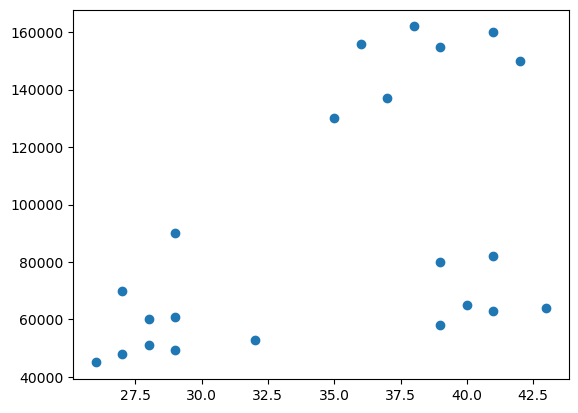

In [3]:
plt.scatter(df['Age'], df['Income($)'])

In [4]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [5]:
k_predict = km.fit_predict(df[['Age','Income($)']])
k_predict

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [6]:
df['cluster'] = k_predict

In [7]:
df

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0
5,Gautam,39,155000,0
6,David,41,160000,0
7,Andrea,38,162000,0
8,Brad,36,156000,0
9,Angelina,35,130000,2


<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

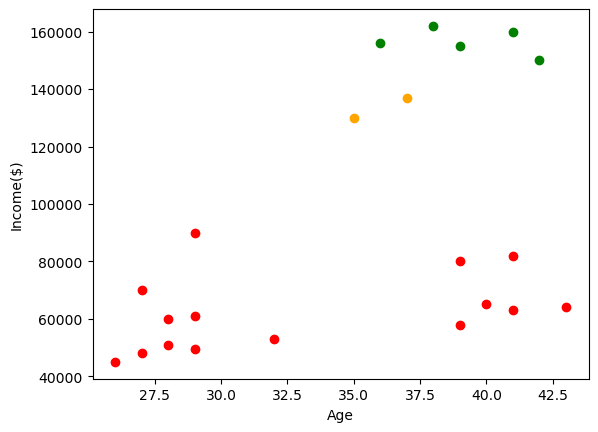

In [8]:
df1 = df[df['cluster']==0]
df2 = df[df['cluster']==1]
df3 = df[df['cluster']==2]

plt.scatter(df1['Age'], df1['Income($)'], color='green')
plt.scatter(df2['Age'], df2['Income($)'], color='red')
plt.scatter(df3['Age'], df3['Income($)'], color='orange')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend

In [9]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,2


In [10]:
km.cluster_centers_

array([[3.92000000e+01, 1.56600000e+05],
       [3.32000000e+01, 6.26333333e+04],
       [3.60000000e+01, 1.33500000e+05]])

<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

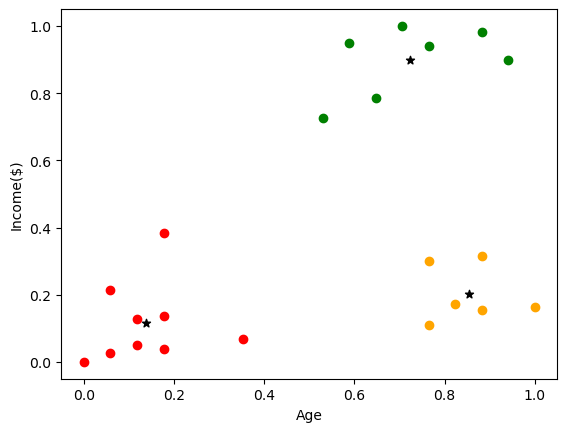

In [11]:
km = KMeans(n_clusters=3)
k_predict = km.fit_predict(df[['Age','Income($)']])
df['cluster'] = k_predict

df1 = df[df['cluster']==0]
df2 = df[df['cluster']==1]
df3 = df[df['cluster']==2]

plt.scatter(df1['Age'], df1['Income($)'], color='green')
plt.scatter(df2['Age'], df2['Income($)'], color='red')
plt.scatter(df3['Age'], df3['Income($)'], color='orange')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='*')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend

In [12]:
import os 
os.environ['OMP_NUM_THREADS'] = '1'

k_range = range(1,11)
sse = []

for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)
    

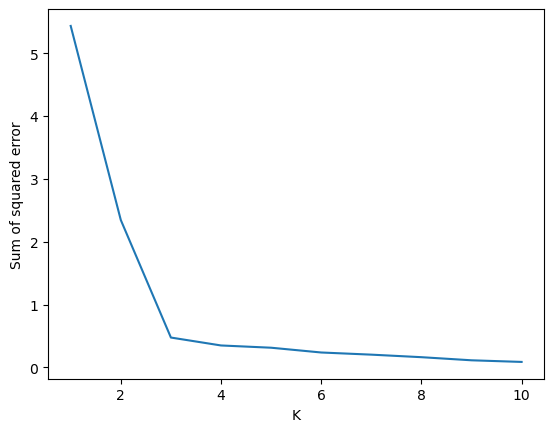

In [13]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range,sse)